In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_17348\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [6]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [7]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [8]:
df.shape

(994879, 4)

In [9]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [10]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   Charge     994879 non-null  float64
dtypes: float64(5)
memory usage: 38.0 MB


Text(0.5, 1.0, 'Capacity vs TIme')

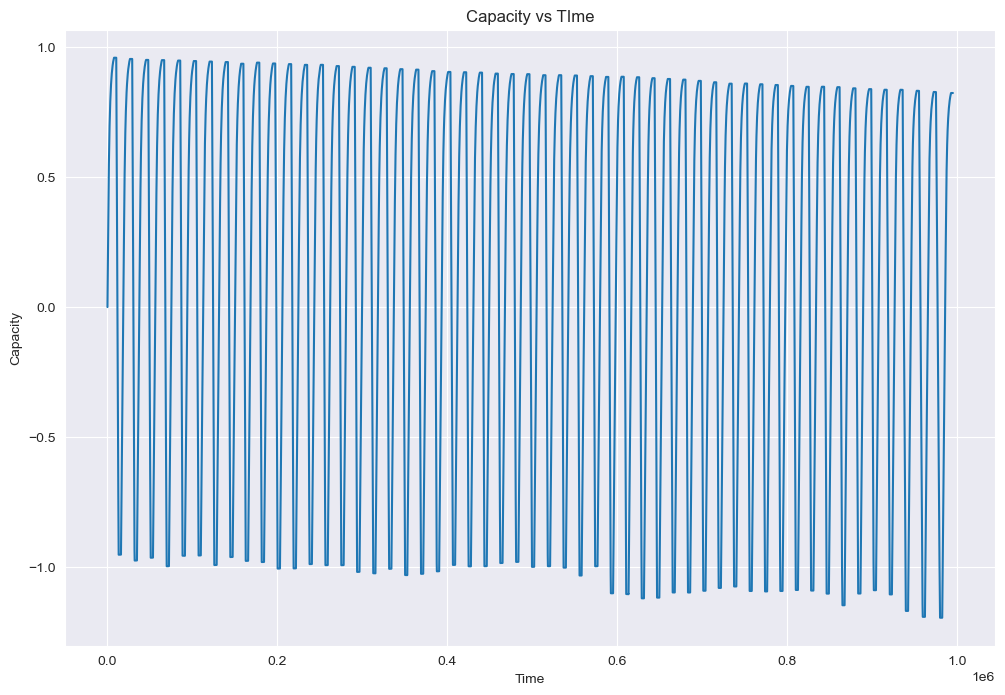

In [12]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Local Maxima and Minima

In [13]:
# %%time
# from scipy.signal import argrelextrema
# import numpy as np

# ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
# ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

# df.Capacity.plot(figsize=(20,12), alpha=.3)
# # filter prices that are peaks and plot them differently to be visable on the plot
# df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
# df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
# plt.ylabel("Capacity")
# plt.xlabel("Time")
# plt.title('Local Maxima and Local Minima')

In [14]:
# maximum_point = df['Capacity'][ilocs_max].unique()
# minimum_point = df['Capacity'][ilocs_min].unique()

In [15]:
# print(maximum_point)
# print(maximum_point.max())
# print(minimum_point)

In [16]:
# df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [17]:
df.head(20)

,Time,Potential,Current,Capacity,Charge
0,0.5,3.94214,1.24797,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.81737
2,2.0,3.94806,1.24790,0.000601,2.16510
3,3.0,3.95068,1.24790,0.000927,3.33812
4,4.0,3.95281,1.24790,0.001298,4.67338
5,5.0,3.95467,1.24789,0.001624,5.84639
6,6.0,3.95637,1.24791,0.001995,7.18165
7,7.0,3.95793,1.24789,0.002321,8.35467
8,8.0,3.95938,1.24790,0.002692,9.68992
9,9.0,3.96077,1.24789,0.003017,10.86290


# Integral current

In [18]:
# from scipy.integrate import cumulative_trapezoid

# p = df["Time"][:df.shape[0]]
# q = df["Current"][:df.shape[0]]

# integral = (cumulative_trapezoid(q,p,initial=0))/(3600*0.96)

# df.loc[:, "Integral_current"] = integral

In [19]:
# sns.set_style("darkgrid")
# plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
# plt.plot(df['Integral_current'],color='green')
# plt.ylabel('Integral_Current')
# plt.xlabel('Time')
# plt.legend(["Soc", "Integral current"], loc ="upper left")
# plt.title('Dataset')

In [20]:
df.head()

,Time,Potential,Current,Capacity,Charge
0,0.5,3.94214,1.24797,0.000000,0.00000
1,1.0,3.94504,1.24789,0.000227,0.81737
2,2.0,3.94806,1.24790,0.000601,2.16510
3,3.0,3.95068,1.24790,0.000927,3.33812
4,4.0,3.95281,1.24790,0.001298,4.67338


In [21]:
df.insert(loc = 4,column ='Power',value=df["Potential"]*df['Current'])

Text(0.5, 1.0, 'Dataset')

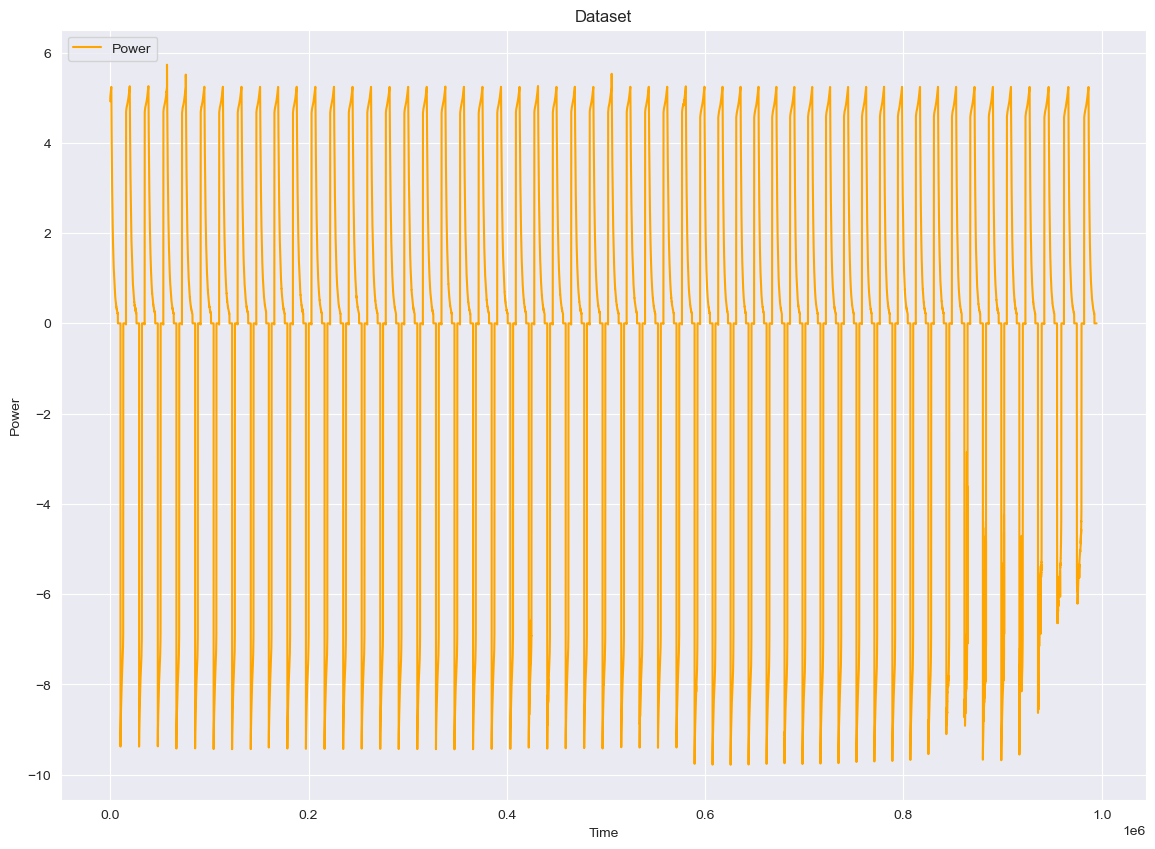

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(df['Power'],color='orange')
# plt.plot(df['Integral_current'],color='green')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend(["Power"], loc ="upper left")
plt.title('Dataset')

In [23]:
df.describe()

,Time,Potential,Current,Capacity,Power,Charge
count,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000,994879.000000
mean,501042.738163,3.886127,0.002878,0.146517,0.285109,527.461697
std,288767.217690,0.382038,1.142440,0.752569,3.993079,2709.247496
min,0.500000,2.750290,-2.503150,-1.195086,-9.777741,-4302.310000
25%,250933.600000,3.475400,0.000000,-0.602635,0.000000,-2169.485000
50%,501905.600000,4.147310,0.072232,0.455186,0.303331,1638.670000
75%,751231.300000,4.199370,0.795196,0.839904,3.339343,3023.655000
max,999999.600000,4.199950,1.364510,0.959319,5.730082,3453.550000


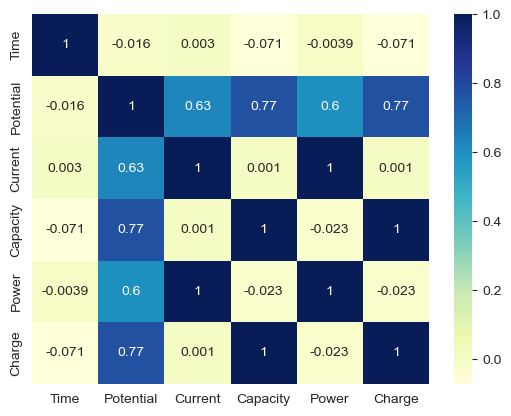

<Figure size 1400x1000 with 0 Axes>

In [24]:
import seaborn as sn
dataplot = sn.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.figure(figsize = (14,10))
plt.show()

# Modeling

In [25]:
# timest = df.pop('Time')
# soc = df.pop("SOC")
charge = df.pop('Charge')

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [27]:
df.head()

,Time,Potential,Current,Capacity,Power
0,0.000000e+00,0.822158,0.969868,0.554717,4.919672
1,5.000005e-07,0.824159,0.969847,0.554823,4.922976
2,1.500001e-06,0.826242,0.969850,0.554996,4.926784
3,2.500002e-06,0.828049,0.969850,0.555148,4.930054
4,3.500003e-06,0.829519,0.969850,0.555320,4.932712


In [28]:
Y = df.pop('Power')
X = df

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((795903, 4), (198976, 4), (795903,), (198976,))

In [31]:
X_train.head(20)

,Time,Potential,Current,Capacity
861243,0.866339,0.986231,0.647200,0.947422
42204,0.042542,0.999572,0.690548,0.958415
963263,0.968381,0.721328,0.969672,0.211679
248446,0.250660,0.999614,0.682392,0.960185
86469,0.087147,0.404950,0.000483,0.720504
417870,0.421632,0.999607,0.670784,0.960198
628635,0.633682,0.345205,0.647200,0.034642
8070,0.008070,0.989742,0.647200,1.000000
61862,0.062371,0.999593,0.676874,0.974129
349706,0.352780,0.137977,0.000171,0.175445


In [32]:
Y_train.head()

861243    0.000000
42204     0.704030
963263    4.734372
248446    0.571579
86469    -8.347597
Name: Power, dtype: float64

In [33]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:

callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 15,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

# AIC Function

In [36]:
#  Function for the AIC 

import tensorflow as tf
from scipy.stats import norm

# Train your model using TensorFlow
def AIC_value(model,Y_pred,Y_test):
    # model = model_1

    Y_test = np.asarray(Y_test).astype('float32').reshape((-1,1))
    Y_pred_1 = np.asarray(Y_pred).astype('float32').reshape((-1,1))


    # Calculate the negative log-likelihood of the model's parameters based on the training data
    nll = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y_test, logits=Y_pred_1))

    # Calculate the number of parameters in the model
    num_params = model.count_params()

    # Calculate the AIC value for the model
    aic = 2 * num_params - 2 * nll

    # Print the AIC value
    print("AIC: ", aic.numpy())

# Modeling

In [37]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(200),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(1)])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_1 = model_1.fit(X_train,Y_train, epochs= 100,batch_size=16,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
49744/49744 [==============================] - 102s 2ms/step - loss: 0.2099 - rmse: 0.3335 - mae: 0.2099 - mse: 0.1112 - mape: 39861272.0000 - val_loss: 0.2276 - val_rmse: 0.3016 - val_mae: 0.2276 - val_mse: 0.0910 - val_mape: 72147240.0000
Epoch 2/100
49744/49744 [==============================] - 101s 2ms/step - loss: 0.1983 - rmse: 0.3085 - mae: 0.1983 - mse: 0.0952 - mape: 35116148.0000 - val_loss: 0.2096 - val_rmse: 0.3268 - val_mae: 0.2096 - val_mse: 0.1068 - val_mape: 51110548.0000
Epoch 3/100
49744/49744 [==============================] - 103s 2ms/step - loss: 0.1970 - rmse: 0.3076 - mae: 0.1970 - mse: 0.0946 - mape: 34351364.0000 - val_loss: 0.1989 - val_rmse: 0.3057 - val_mae: 0.1989 - val_mse: 0.0934 - val_mape: 43444520.0000
Epoch 4/100
49744/49744 [==============================] - 104s 2ms/step - loss: 0.1963 - rmse: 0.3072 - mae: 0.1963 - mse: 0.0943 - mape: 34040380.0000 - val_loss: 0.1967 - val_rmse: 0.2977 - val_mae: 0.1967 - val_mse: 0.0886 - val_mape: 30

49744/49744 [==============================] - 123s 2ms/step - loss: 0.1949 - rmse: 0.3055 - mae: 0.1949 - mse: 0.0933 - mape: 33139572.0000 - val_loss: 0.1951 - val_rmse: 0.3040 - val_mae: 0.1951 - val_mse: 0.0924 - val_mape: 36141604.0000
Epoch 34/100
49744/49744 [==============================] - 126s 3ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33204592.0000 - val_loss: 0.1951 - val_rmse: 0.3056 - val_mae: 0.1951 - val_mse: 0.0934 - val_mape: 29978236.0000
Epoch 35/100
49744/49744 [==============================] - 124s 2ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33172664.0000 - val_loss: 0.1949 - val_rmse: 0.3066 - val_mae: 0.1949 - val_mse: 0.0940 - val_mape: 30581154.0000
Epoch 35: early stopping
CPU times: total: 1h 51min 18s
Wall time: 1h 10min 37s


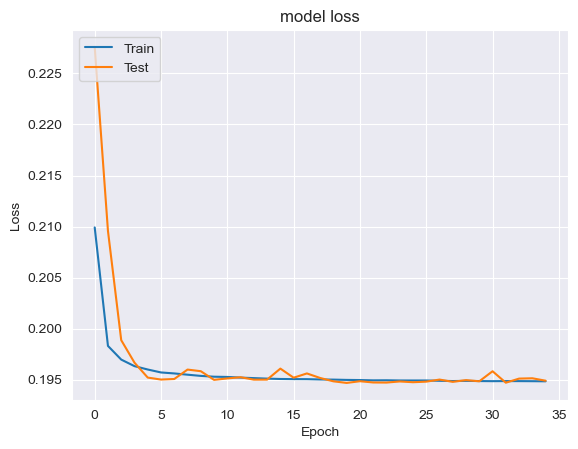

In [38]:
plot_his(history_1)

In [39]:
model_1.evaluate(X_test,Y_test)

6218/6218 [==============================] - 13s 2ms/step - loss: 0.1949 - rmse: 0.3066 - mae: 0.1949 - mse: 0.0940 - mape: 30581090.0000


[0.19489285349845886,
 0.30658963322639465,
 0.19489285349845886,
 0.09399720281362534,
 30581090.0]

In [40]:
Y_pred_1 = model_1.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [41]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               1000      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 26,201
Trainable params: 26,201
Non-trainable params: 0
_________________________________________________________________


In [42]:
AIC_value(model_1,Y_pred_1,Y_test)

AIC:  52431.027


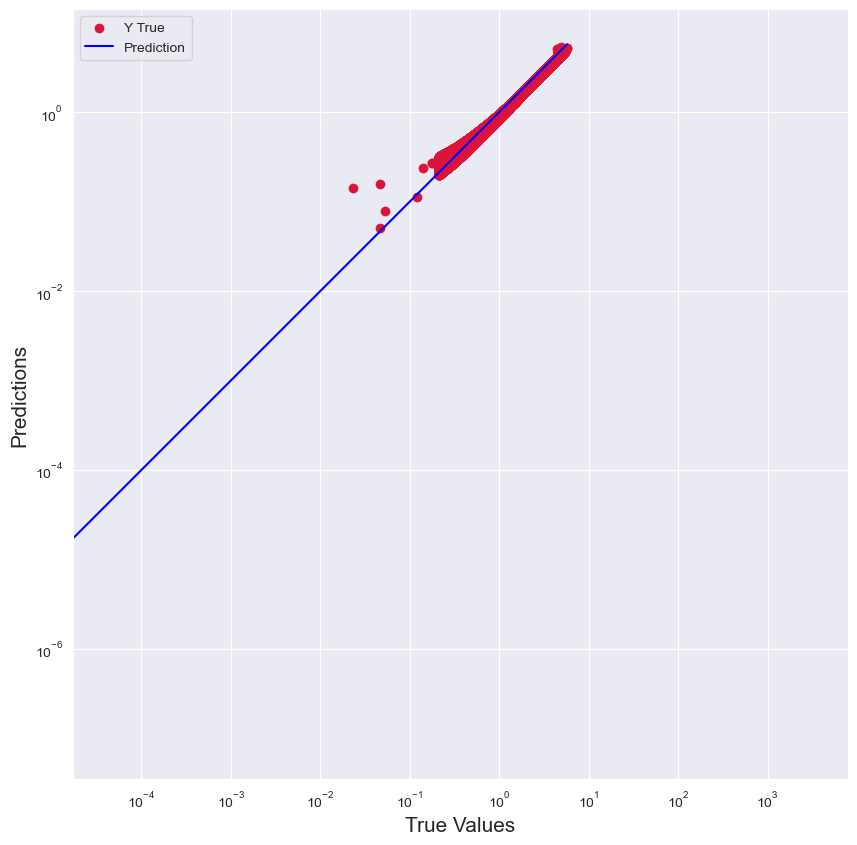

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_1), max(Y_test))
p2 = min(min(Y_pred_1), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [43]:
model_1.save('Saved_models/model_1_Poweresti.h5')

# Model 2

In [44]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_2 = model_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.2123 - rmse: 0.3599 - mae: 0.2123 - mse: 0.1296 - mape: 39942436.0000 - val_loss: 0.2034 - val_rmse: 0.2910 - val_mae: 0.2034 - val_mse: 0.0847 - val_mape: 46346132.0000
Epoch 2/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.1985 - rmse: 0.3081 - mae: 0.1985 - mse: 0.0950 - mape: 35352064.0000 - val_loss: 0.2025 - val_rmse: 0.3342 - val_mae: 0.2025 - val_mse: 0.1117 - val_mape: 42132408.0000
Epoch 3/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.1972 - rmse: 0.3074 - mae: 0.1972 - mse: 0.0945 - mape: 34632540.0000 - val_loss: 0.1978 - val_rmse: 0.3145 - val_mae: 0.1978 - val_mse: 0.0989 - val_mape: 40121788.0000
Epoch 4/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.1965 - rmse: 0.3069 - mae: 0.1965 - mse: 0.0942 - mape: 34221712.0000 - val_loss: 0.1990 - val_rmse: 0.3033 - val_mae: 0.1990 - val_mse: 0.0920 - val_mape: 263251

24872/24872 [==============================] - 60s 2ms/step - loss: 0.1949 - rmse: 0.3055 - mae: 0.1949 - mse: 0.0933 - mape: 33151016.0000 - val_loss: 0.1954 - val_rmse: 0.3032 - val_mae: 0.1954 - val_mse: 0.0920 - val_mape: 37171768.0000
Epoch 34/100
24872/24872 [==============================] - 59s 2ms/step - loss: 0.1949 - rmse: 0.3054 - mae: 0.1949 - mse: 0.0933 - mape: 33218670.0000 - val_loss: 0.1952 - val_rmse: 0.3058 - val_mae: 0.1952 - val_mse: 0.0935 - val_mape: 29750248.0000
Epoch 35/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.1949 - rmse: 0.3054 - mae: 0.1949 - mse: 0.0933 - mape: 33188184.0000 - val_loss: 0.1950 - val_rmse: 0.3072 - val_mae: 0.1950 - val_mse: 0.0943 - val_mape: 30132956.0000
Epoch 35: early stopping
CPU times: total: 53min 19s
Wall time: 34min 57s


In [45]:
model_2.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1950 - rmse: 0.3072 - mae: 0.1950 - mse: 0.0943 - mape: 30132956.0000


[0.19499532878398895,
 0.30715352296829224,
 0.19499532878398895,
 0.09434328973293304,
 30132956.0]

In [46]:
Y_pred_2 = model_2.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


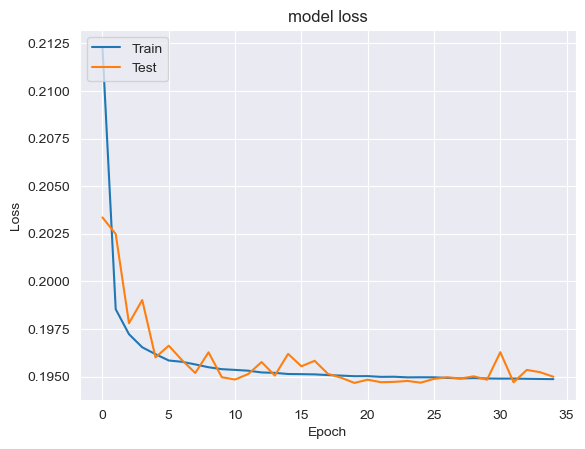

In [47]:
plot_his(history_2)

In [48]:
AIC_value(model_2,Y_pred_2,Y_test)

AIC:  12171.031


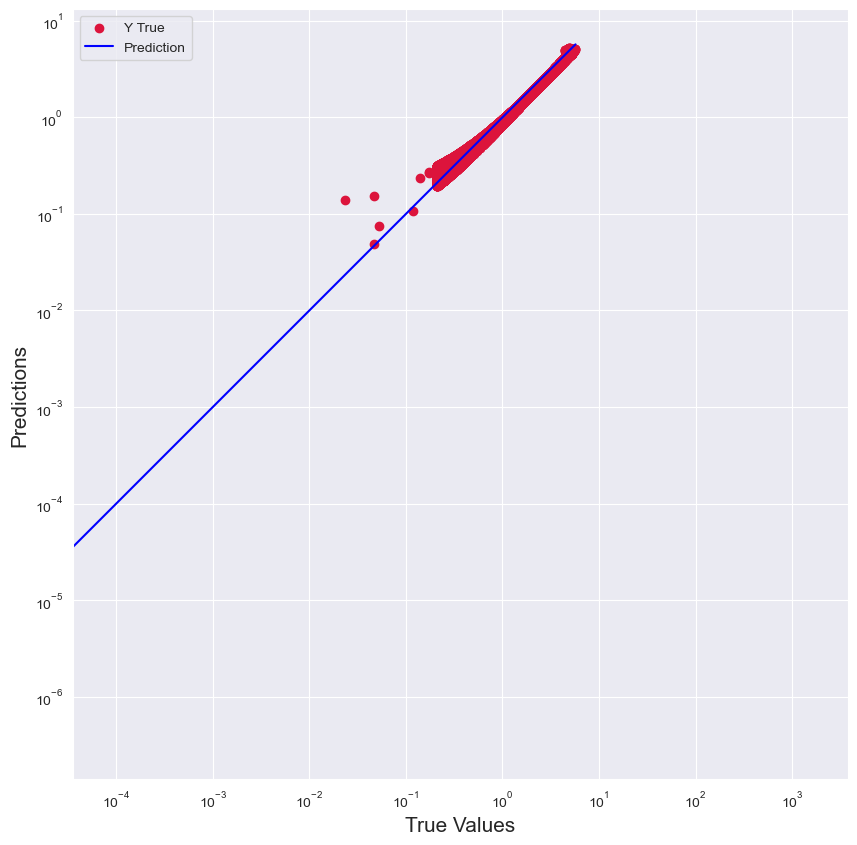

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_2), max(Y_test))
p2 = min(min(Y_pred_2), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [49]:
model_2.save('Saved_models/model_2_Poweresti.h5')

# Model 3

In [50]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.Dense(70),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_3 = model_3.fit(X_train,Y_train,batch_size=128, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
6218/6218 [==============================] - 16s 2ms/step - loss: 0.0808 - rmse: 0.4377 - mae: 0.0808 - mse: 0.1916 - mape: 15325857.0000 - val_loss: 0.0229 - val_rmse: 0.0311 - val_mae: 0.0229 - val_mse: 9.6644e-04 - val_mape: 5876083.5000
Epoch 2/100
6218/6218 [==============================] - 15s 2ms/step - loss: 0.0187 - rmse: 0.0265 - mae: 0.0187 - mse: 7.0200e-04 - mape: 5000096.0000 - val_loss: 0.0286 - val_rmse: 0.0316 - val_mae: 0.0286 - val_mse: 9.9769e-04 - val_mape: 8021767.0000
Epoch 3/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0132 - rmse: 0.0187 - mae: 0.0132 - mse: 3.4851e-04 - mape: 3643250.2500 - val_loss: 0.0234 - val_rmse: 0.0256 - val_mae: 0.0234 - val_mse: 6.5614e-04 - val_mape: 6927940.5000
Epoch 4/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0099 - rmse: 0.0147 - mae: 0.0099 - mse: 2.1554e-04 - mape: 2691785.0000 - val_loss: 0.0184 - val_rmse: 0.0209 - val_mae: 0.0184 - val_mse: 4.3714e-04 - va

6218/6218 [==============================] - 16s 3ms/step - loss: 0.0021 - rmse: 0.0071 - mae: 0.0021 - mse: 4.9724e-05 - mape: 430674.3125 - val_loss: 0.0027 - val_rmse: 0.0070 - val_mae: 0.0027 - val_mse: 4.8696e-05 - val_mape: 603057.8750
Epoch 34/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0021 - rmse: 0.0070 - mae: 0.0021 - mse: 4.9486e-05 - mape: 439665.1875 - val_loss: 0.0030 - val_rmse: 0.0071 - val_mae: 0.0030 - val_mse: 5.0841e-05 - val_mape: 662358.3125
Epoch 35/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0020 - rmse: 0.0070 - mae: 0.0020 - mse: 4.8939e-05 - mape: 395832.2500 - val_loss: 0.0018 - val_rmse: 0.0068 - val_mae: 0.0018 - val_mse: 4.5798e-05 - val_mape: 410333.8438
Epoch 36/100
6218/6218 [==============================] - 16s 3ms/step - loss: 0.0020 - rmse: 0.0070 - mae: 0.0020 - mse: 4.9018e-05 - mape: 406182.2500 - val_loss: 0.0015 - val_rmse: 0.0067 - val_mae: 0.0015 - val_mse: 4.4684e-05 - val_mape: 23398

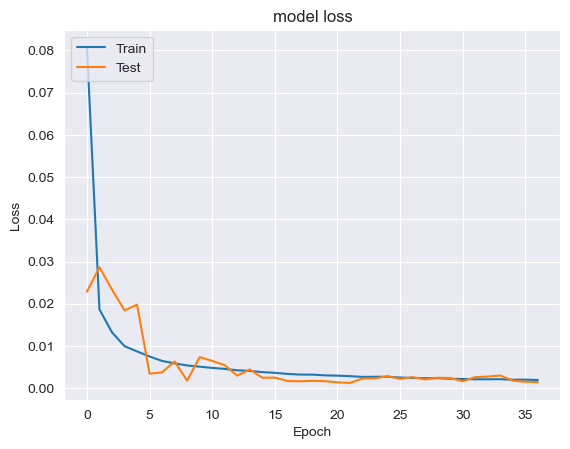

In [51]:
plot_his(history_3)

In [52]:
model_3.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0014 - rmse: 0.0067 - mae: 0.0014 - mse: 4.5205e-05 - mape: 302309.2500


[0.0014362091897055507,
 0.00672345794737339,
 0.0014362091897055507,
 4.520488437265158e-05,
 302309.25]

In [53]:
Y_pred_3 = model_3.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [54]:
AIC_value(model_3,Y_pred_3,Y_test)

AIC:  8870.494


In [55]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 70)                350       
                                                                 
 dense_9 (Dense)             (None, 50)                3550      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,421
Trainable params: 4,421
Non-trainable params: 0
_________________________________________________________________


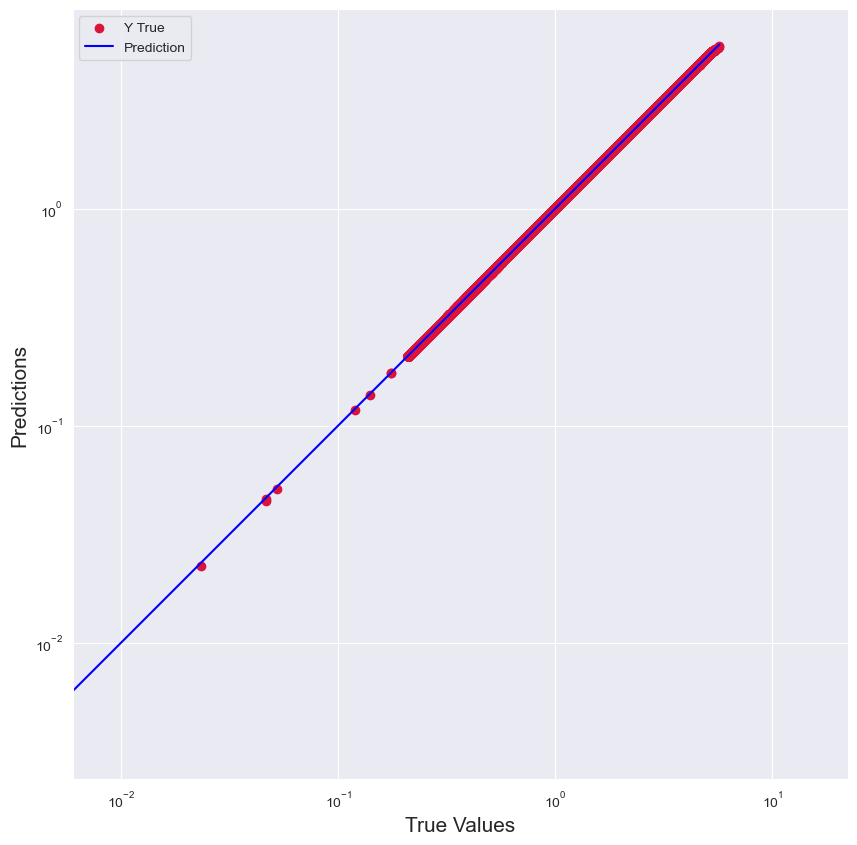

In [128]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_3, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_3), max(Y_test))
p2 = min(min(Y_pred_3), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [56]:
model_3.save('Saved_models/model_3_Poweresti.h5')

# Model 4

In [57]:
%%time
import tensorflow as tf
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(150),
                               tf.keras.layers.Dense(50),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_4 = model_4.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 82s 3ms/step - loss: 0.0298 - rmse: 0.2135 - mae: 0.0298 - mse: 0.0456 - mape: 5868181.0000 - val_loss: 0.0084 - val_rmse: 0.0300 - val_mae: 0.0084 - val_mse: 8.9770e-04 - val_mape: 1126773.3750
Epoch 2/100
24872/24872 [==============================] - 72s 3ms/step - loss: 0.0062 - rmse: 0.0287 - mae: 0.0062 - mse: 8.2454e-04 - mape: 650991.5000 - val_loss: 0.0051 - val_rmse: 0.0272 - val_mae: 0.0051 - val_mse: 7.3896e-04 - val_mape: 389090.3125
Epoch 3/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0050 - rmse: 0.0263 - mae: 0.0050 - mse: 6.9093e-04 - mape: 488346.9688 - val_loss: 0.0048 - val_rmse: 0.0252 - val_mae: 0.0048 - val_mse: 6.3713e-04 - val_mape: 588369.4375
Epoch 4/100
24872/24872 [==============================] - 69s 3ms/step - loss: 0.0043 - rmse: 0.0244 - mae: 0.0043 - mse: 5.9712e-04 - mape: 382812.1562 - val_loss: 0.0043 - val_rmse: 0.0237 - val_mae: 0.0043 - val_mse: 5.6355e-04 - 

24872/24872 [==============================] - 79s 3ms/step - loss: 0.0024 - rmse: 0.0176 - mae: 0.0024 - mse: 3.0884e-04 - mape: 36921.2539 - val_loss: 0.0024 - val_rmse: 0.0177 - val_mae: 0.0024 - val_mse: 3.1394e-04 - val_mape: 33450.9688
Epoch 34/100
24872/24872 [==============================] - 77s 3ms/step - loss: 0.0024 - rmse: 0.0175 - mae: 0.0024 - mse: 3.0751e-04 - mape: 36408.5820 - val_loss: 0.0024 - val_rmse: 0.0177 - val_mae: 0.0024 - val_mse: 3.1259e-04 - val_mape: 31805.5176
Epoch 35/100
24872/24872 [==============================] - 76s 3ms/step - loss: 0.0024 - rmse: 0.0175 - mae: 0.0024 - mse: 3.0649e-04 - mape: 35948.2383 - val_loss: 0.0024 - val_rmse: 0.0176 - val_mae: 0.0024 - val_mse: 3.1150e-04 - val_mape: 25518.2422
Epoch 36/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.0024 - rmse: 0.0175 - mae: 0.0024 - mse: 3.0504e-04 - mape: 34808.9844 - val_loss: 0.0024 - val_rmse: 0.0176 - val_mae: 0.0024 - val_mse: 3.0988e-04 - val_mape: 3983

24872/24872 [==============================] - 66s 3ms/step - loss: 0.0023 - rmse: 0.0168 - mae: 0.0023 - mse: 2.8123e-04 - mape: 25890.4609 - val_loss: 0.0023 - val_rmse: 0.0169 - val_mae: 0.0023 - val_mse: 2.8684e-04 - val_mape: 21963.8320
Epoch 66/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0023 - rmse: 0.0168 - mae: 0.0023 - mse: 2.8068e-04 - mape: 25693.5059 - val_loss: 0.0023 - val_rmse: 0.0169 - val_mae: 0.0023 - val_mse: 2.8628e-04 - val_mape: 19438.1777
Epoch 67/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0023 - rmse: 0.0167 - mae: 0.0023 - mse: 2.8008e-04 - mape: 25182.7188 - val_loss: 0.0023 - val_rmse: 0.0169 - val_mae: 0.0023 - val_mse: 2.8544e-04 - val_mape: 31801.8867
Epoch 68/100
24872/24872 [==============================] - 65s 3ms/step - loss: 0.0023 - rmse: 0.0167 - mae: 0.0023 - mse: 2.7948e-04 - mape: 25235.9453 - val_loss: 0.0023 - val_rmse: 0.0169 - val_mae: 0.0023 - val_mse: 2.8508e-04 - val_mape: 2832

24872/24872 [==============================] - 69s 3ms/step - loss: 0.0022 - rmse: 0.0163 - mae: 0.0022 - mse: 2.6567e-04 - mape: 21490.5469 - val_loss: 0.0022 - val_rmse: 0.0165 - val_mae: 0.0022 - val_mse: 2.7129e-04 - val_mape: 32207.5703
Epoch 98/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0022 - rmse: 0.0163 - mae: 0.0022 - mse: 2.6530e-04 - mape: 21059.0430 - val_loss: 0.0022 - val_rmse: 0.0165 - val_mae: 0.0022 - val_mse: 2.7066e-04 - val_mape: 17404.9473
Epoch 99/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0022 - rmse: 0.0163 - mae: 0.0022 - mse: 2.6497e-04 - mape: 21252.5957 - val_loss: 0.0022 - val_rmse: 0.0164 - val_mae: 0.0022 - val_mse: 2.7029e-04 - val_mape: 18252.8887
Epoch 100/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0022 - rmse: 0.0163 - mae: 0.0022 - mse: 2.6455e-04 - mape: 20963.2676 - val_loss: 0.0022 - val_rmse: 0.0164 - val_mae: 0.0022 - val_mse: 2.6988e-04 - val_mape: 162

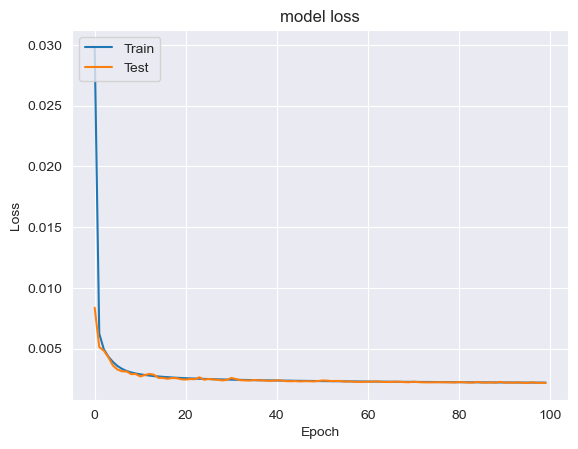

In [58]:
plot_his(history_4)

In [59]:
model_4.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.0022 - rmse: 0.0164 - mae: 0.0022 - mse: 2.6988e-04 - mape: 16266.5234


[0.002180428011342883,
 0.016428017988801003,
 0.002180428011342883,
 0.0002698797616176307,
 16266.5234375]

In [60]:
Y_pred_4 = model_4.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [61]:
AIC_value(model_4,Y_pred_4,Y_test)

AIC:  17670.504


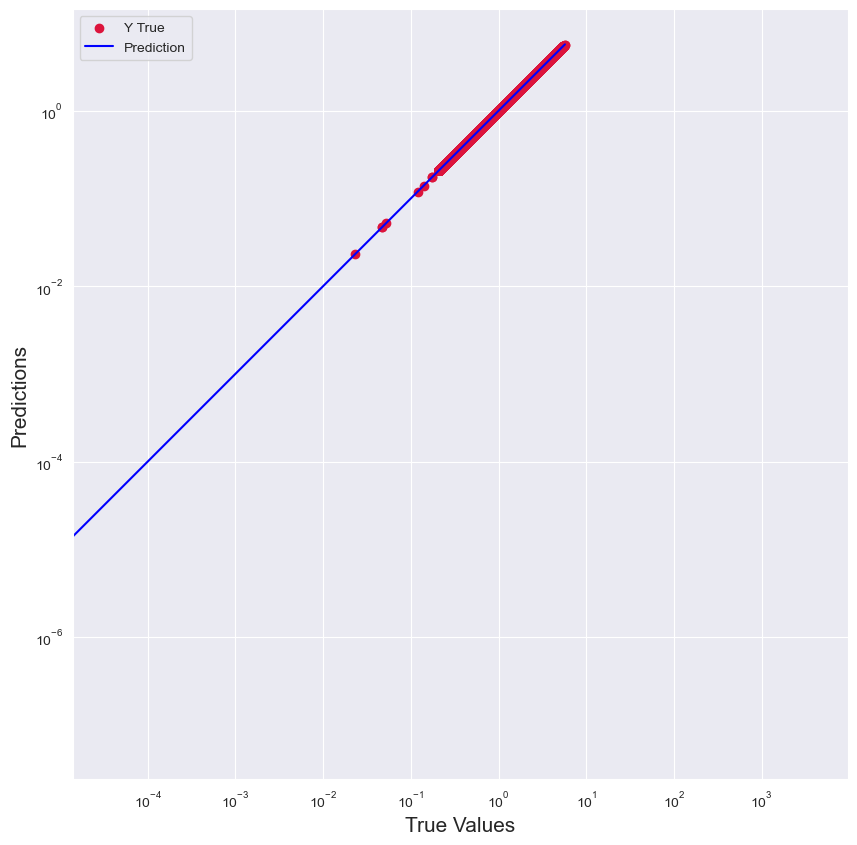

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred_4, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred_4), max(Y_test))
p2 = min(min(Y_pred_4), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [62]:
model_4.save('Saved_models/model_4_Poweresti.h5')

# Model 5

In [63]:
%%time
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(1)])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_5 = model_5.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/50
24872/24872 [==============================] - 162s 6ms/step - loss: 0.0788 - rmse: 0.4487 - mae: 0.0788 - mse: 0.2013 - mape: 13429726.0000 - val_loss: 0.0104 - val_rmse: 0.0133 - val_mae: 0.0104 - val_mse: 1.7602e-04 - val_mape: 2038289.5000
Epoch 2/50
24872/24872 [==============================] - 157s 6ms/step - loss: 0.0129 - rmse: 0.0168 - mae: 0.0129 - mse: 2.8260e-04 - mape: 3329411.2500 - val_loss: 0.0081 - val_rmse: 0.0097 - val_mae: 0.0081 - val_mse: 9.4883e-05 - val_mape: 1931319.5000
Epoch 3/50
24872/24872 [==============================] - 157s 6ms/step - loss: 0.0079 - rmse: 0.0103 - mae: 0.0079 - mse: 1.0552e-04 - mape: 2064370.2500 - val_loss: 0.0078 - val_rmse: 0.0086 - val_mae: 0.0078 - val_mse: 7.4674e-05 - val_mape: 2168682.5000
Epoch 4/50
24872/24872 [==============================] - 157s 6ms/step - loss: 0.0057 - rmse: 0.0074 - mae: 0.0057 - mse: 5.5098e-05 - mape: 1501004.2500 - val_loss: 0.0032 - val_rmse: 0.0043 - val_mae: 0.0032 - val_mse: 1.8800e

24872/24872 [==============================] - 163s 7ms/step - loss: 9.6141e-04 - rmse: 0.0014 - mae: 9.6141e-04 - mse: 1.8289e-06 - mape: 288122.4062 - val_loss: 0.0012 - val_rmse: 0.0015 - val_mae: 0.0012 - val_mse: 2.3195e-06 - val_mape: 327755.7188
Epoch 33/50
24872/24872 [==============================] - 163s 7ms/step - loss: 9.4895e-04 - rmse: 0.0013 - mae: 9.4895e-04 - mse: 1.7872e-06 - mape: 285310.3125 - val_loss: 7.1034e-04 - val_rmse: 0.0011 - val_mae: 7.1034e-04 - val_mse: 1.3034e-06 - val_mape: 269418.3750
Epoch 34/50
24872/24872 [==============================] - 165s 7ms/step - loss: 9.3409e-04 - rmse: 0.0013 - mae: 9.3409e-04 - mse: 1.7346e-06 - mape: 281425.6250 - val_loss: 8.0251e-04 - val_rmse: 0.0012 - val_mae: 8.0251e-04 - val_mse: 1.4071e-06 - val_mape: 301703.7500
Epoch 35/50
24872/24872 [==============================] - 163s 7ms/step - loss: 9.1825e-04 - rmse: 0.0013 - mae: 9.1825e-04 - mse: 1.6869e-06 - mape: 277083.6875 - val_loss: 7.7643e-04 - val_rmse: 0.0

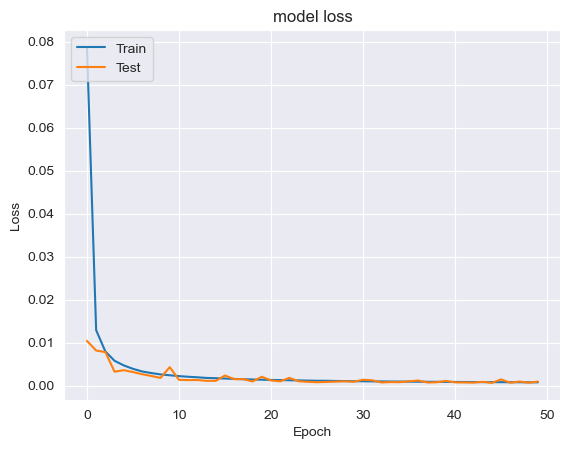

In [64]:
plot_his(history_5)

In [65]:
model_5.evaluate(X_test,Y_test)

6218/6218 [==============================] - 21s 3ms/step - loss: 9.1304e-04 - rmse: 0.0013 - mae: 9.1304e-04 - mse: 1.5631e-06 - mape: 271882.3750


[0.000913042516913265,
 0.0012502506142482162,
 0.000913042516913265,
 1.5631264886906138e-06,
 271882.375]

In [66]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
prediction_5 = model_5.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [68]:
AIC_value(model_5,prediction_5,Y_test)

AIC:  25730.488


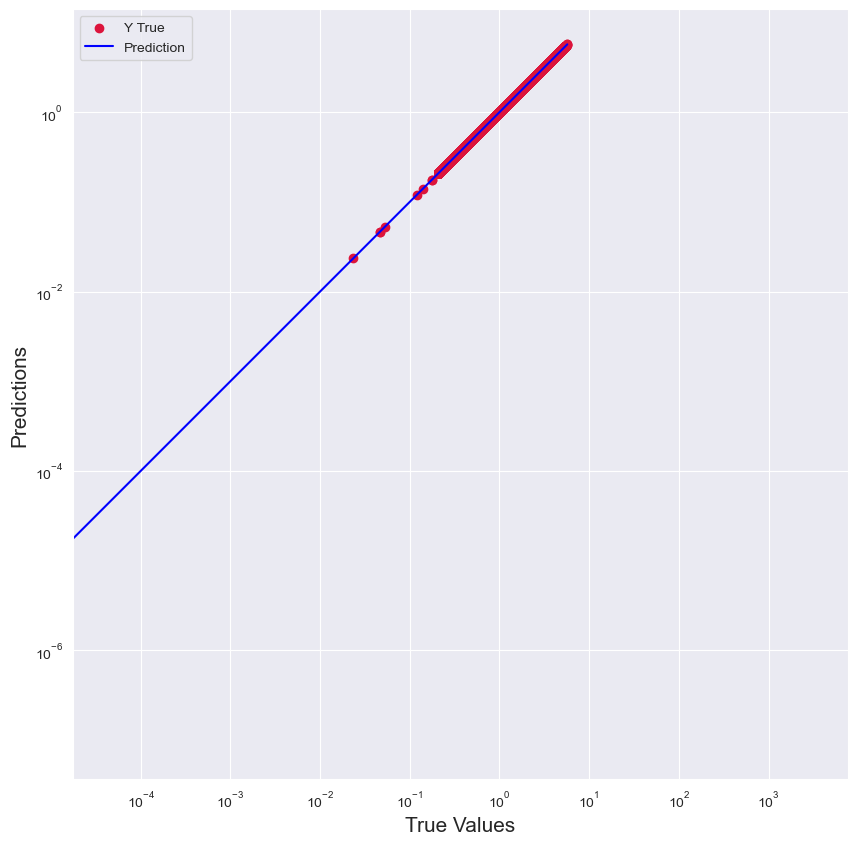

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_5, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_5), max(Y_test))
p2 = min(min(prediction_5), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [69]:
model_5.save('Saved_models/model_5_Poweresti.h5')

# Model 6

In [70]:
%%time
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(30,activation= 'linear'),
                               tf.keras.layers.Dense(20,activation='linear'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_6 = model_6.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
24872/24872 [==============================] - 209s 8ms/step - loss: 0.0756 - rmse: 0.3820 - mae: 0.0756 - mse: 0.1460 - mape: 13940223.0000 - val_loss: 0.0203 - val_rmse: 0.0246 - val_mae: 0.0203 - val_mse: 6.0321e-04 - val_mape: 4732330.5000
Epoch 2/40
24872/24872 [==============================] - 198s 8ms/step - loss: 0.0124 - rmse: 0.0165 - mae: 0.0124 - mse: 2.7069e-04 - mape: 3022220.0000 - val_loss: 0.0038 - val_rmse: 0.0062 - val_mae: 0.0038 - val_mse: 3.8926e-05 - val_mape: 602745.1250
Epoch 3/40
24872/24872 [==============================] - 200s 8ms/step - loss: 0.0080 - rmse: 0.0107 - mae: 0.0080 - mse: 1.1373e-04 - mape: 1944404.5000 - val_loss: 0.0035 - val_rmse: 0.0051 - val_mae: 0.0035 - val_mse: 2.5677e-05 - val_mape: 734992.9375
Epoch 4/40
24872/24872 [==============================] - 190s 8ms/step - loss: 0.0059 - rmse: 0.0080 - mae: 0.0059 - mse: 6.3463e-05 - mape: 1420110.2500 - val_loss: 0.0091 - val_rmse: 0.0100 - val_mae: 0.0091 - val_mse: 9.9018e-0

24872/24872 [==============================] - 201s 8ms/step - loss: 9.4832e-04 - rmse: 0.0017 - mae: 9.4832e-04 - mse: 2.9064e-06 - mape: 217901.4219 - val_loss: 6.6538e-04 - val_rmse: 0.0015 - val_mae: 6.6538e-04 - val_mse: 2.1748e-06 - val_mape: 116647.0312
Epoch 33/40
24872/24872 [==============================] - 210s 8ms/step - loss: 9.2338e-04 - rmse: 0.0017 - mae: 9.2338e-04 - mse: 2.8198e-06 - mape: 212339.6406 - val_loss: 9.4912e-04 - val_rmse: 0.0017 - val_mae: 9.4912e-04 - val_mse: 2.7907e-06 - val_mape: 223206.2344
Epoch 34/40
24872/24872 [==============================] - 214s 9ms/step - loss: 9.0693e-04 - rmse: 0.0017 - mae: 9.0693e-04 - mse: 2.7571e-06 - mape: 208578.7969 - val_loss: 8.8406e-04 - val_rmse: 0.0016 - val_mae: 8.8406e-04 - val_mse: 2.5064e-06 - val_mape: 227604.3594
Epoch 35/40
24872/24872 [==============================] - 197s 8ms/step - loss: 8.9342e-04 - rmse: 0.0016 - mae: 8.9342e-04 - mse: 2.7138e-06 - mape: 205707.5938 - val_loss: 6.3730e-04 - val_r

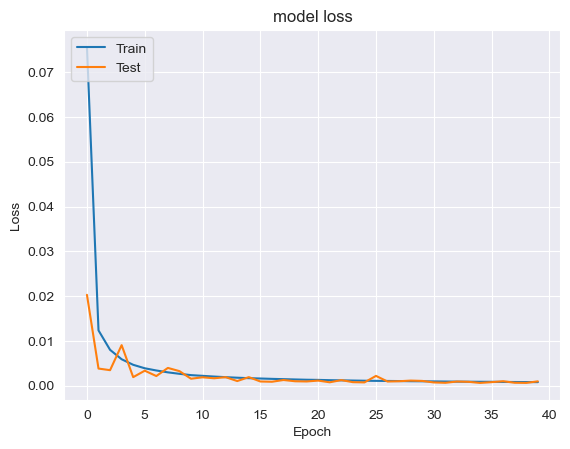

In [71]:
plot_his(history_6)

In [72]:
model_6.evaluate(X_test,Y_test)

6218/6218 [==============================] - 15s 2ms/step - loss: 9.9075e-04 - rmse: 0.0016 - mae: 9.9075e-04 - mse: 2.5967e-06 - mape: 227572.5781


[0.0009907488711178303,
 0.0016114345053210855,
 0.0009907488711178303,
 2.5967210603994317e-06,
 227572.578125]

In [73]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 4, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_17 (Dense)            (None, 20)                620       
                                                                 
 dense_18 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


In [74]:
prediction_6 = model_6.predict(X_test)

6218/6218 [==============================] - 14s 2ms/step


In [75]:
AIC_value(model_6,prediction_6,Y_test)

AIC:  65870.49


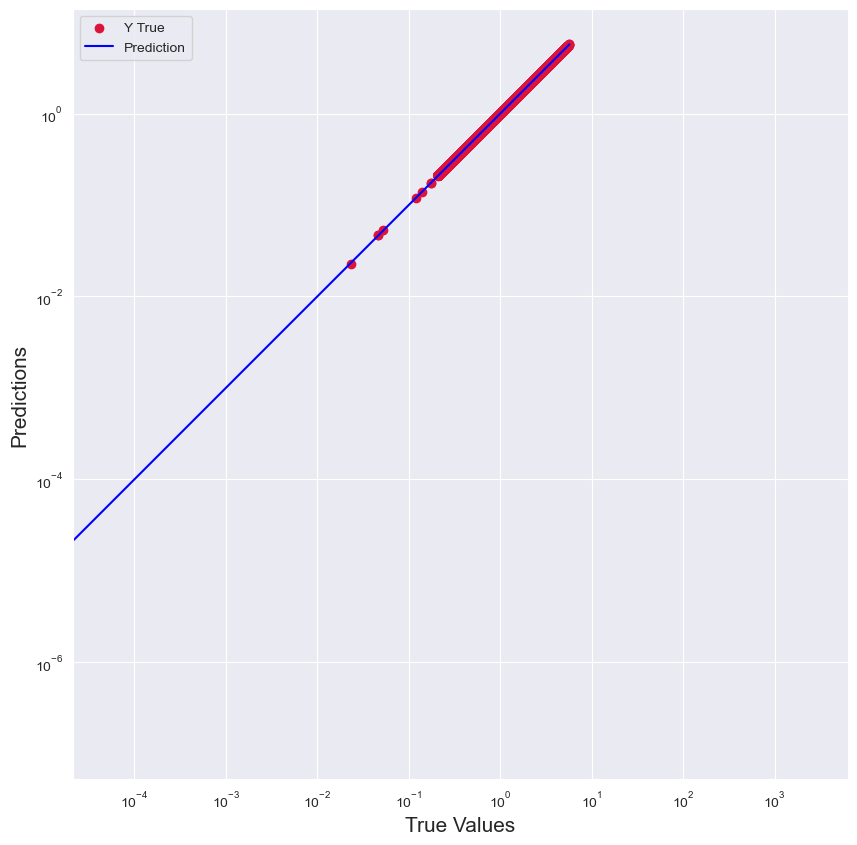

In [133]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_6, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_6), max(Y_test))
p2 = min(min(prediction_6), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [76]:
model_6.save('Saved_models/model_6_Poweresti.h5')

# Model 7

In [77]:
%%time
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([tf.keras.layers.LSTM(30,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(10,activation='linear'),
                               tf.keras.layers.Dense(10,activation = 'relu'),
                               tf.keras.layers.Dense(1)])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_7 = model_7.fit(X_train,Y_train,batch_size = 128,epochs=70,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/70
6218/6218 [==============================] - 40s 6ms/step - loss: 0.2269 - rmse: 0.7383 - mae: 0.2269 - mse: 0.5451 - mape: 34729696.0000 - val_loss: 0.1244 - val_rmse: 0.1370 - val_mae: 0.1244 - val_mse: 0.0188 - val_mape: 30471392.0000
Epoch 2/70
6218/6218 [==============================] - 37s 6ms/step - loss: 0.0658 - rmse: 0.0888 - mae: 0.0658 - mse: 0.0079 - mape: 15355500.0000 - val_loss: 0.0383 - val_rmse: 0.0545 - val_mae: 0.0383 - val_mse: 0.0030 - val_mape: 6345340.5000
Epoch 3/70
6218/6218 [==============================] - 35s 6ms/step - loss: 0.0438 - rmse: 0.0596 - mae: 0.0438 - mse: 0.0035 - mape: 9850635.0000 - val_loss: 0.0230 - val_rmse: 0.0357 - val_mae: 0.0230 - val_mse: 0.0013 - val_mape: 4466603.0000
Epoch 4/70
6218/6218 [==============================] - 37s 6ms/step - loss: 0.0322 - rmse: 0.0436 - mae: 0.0322 - mse: 0.0019 - mape: 7023654.0000 - val_loss: 0.0255 - val_rmse: 0.0333 - val_mae: 0.0255 - val_mse: 0.0011 - val_mape: 5037560.5000
Epoch 5/7

6218/6218 [==============================] - 37s 6ms/step - loss: 0.0037 - rmse: 0.0055 - mae: 0.0037 - mse: 2.9997e-05 - mape: 781948.5000 - val_loss: 0.0021 - val_rmse: 0.0042 - val_mae: 0.0021 - val_mse: 1.7307e-05 - val_mape: 266016.6250
Epoch 34/70
6218/6218 [==============================] - 37s 6ms/step - loss: 0.0036 - rmse: 0.0053 - mae: 0.0036 - mse: 2.8460e-05 - mape: 761590.0000 - val_loss: 0.0046 - val_rmse: 0.0059 - val_mae: 0.0046 - val_mse: 3.4599e-05 - val_mape: 1067086.5000
Epoch 35/70
6218/6218 [==============================] - 36s 6ms/step - loss: 0.0035 - rmse: 0.0052 - mae: 0.0035 - mse: 2.7170e-05 - mape: 743254.0625 - val_loss: 0.0021 - val_rmse: 0.0040 - val_mae: 0.0021 - val_mse: 1.5996e-05 - val_mape: 265360.3750
Epoch 36/70
6218/6218 [==============================] - 36s 6ms/step - loss: 0.0033 - rmse: 0.0050 - mae: 0.0033 - mse: 2.4687e-05 - mape: 693918.6250 - val_loss: 0.0020 - val_rmse: 0.0039 - val_mae: 0.0020 - val_mse: 1.5279e-05 - val_mape: 251183.

6218/6218 [==============================] - 39s 6ms/step - loss: 0.0019 - rmse: 0.0029 - mae: 0.0019 - mse: 8.2077e-06 - mape: 425101.4062 - val_loss: 0.0013 - val_rmse: 0.0023 - val_mae: 0.0013 - val_mse: 5.2202e-06 - val_mape: 228811.1406
Epoch 66/70
6218/6218 [==============================] - 38s 6ms/step - loss: 0.0019 - rmse: 0.0028 - mae: 0.0019 - mse: 7.8187e-06 - mape: 406778.3438 - val_loss: 0.0013 - val_rmse: 0.0023 - val_mae: 0.0013 - val_mse: 5.2143e-06 - val_mape: 254603.0156
Epoch 67/70
6218/6218 [==============================] - 38s 6ms/step - loss: 0.0019 - rmse: 0.0028 - mae: 0.0019 - mse: 7.9446e-06 - mape: 421902.5625 - val_loss: 0.0017 - val_rmse: 0.0028 - val_mae: 0.0017 - val_mse: 7.7338e-06 - val_mape: 372464.0938
Epoch 68/70
6218/6218 [==============================] - 37s 6ms/step - loss: 0.0018 - rmse: 0.0027 - mae: 0.0018 - mse: 7.4529e-06 - mape: 409603.2188 - val_loss: 0.0015 - val_rmse: 0.0023 - val_mae: 0.0015 - val_mse: 5.4092e-06 - val_mape: 290794.0

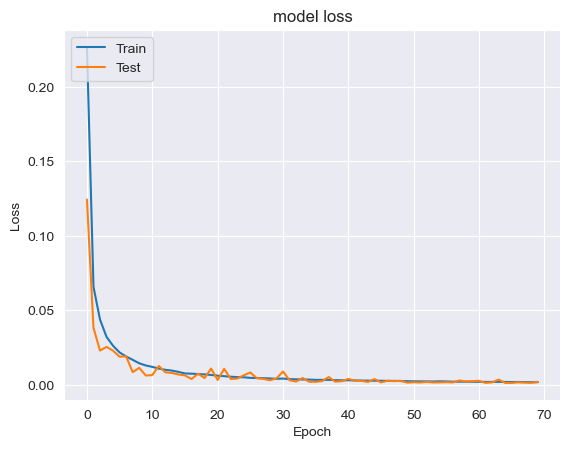

In [78]:
plot_his(history_7)

In [79]:
prediction_7 = model_7.predict(X_test)

6218/6218 [==============================] - 13s 2ms/step


In [80]:
model_7.evaluate(X_test,Y_test)

6218/6218 [==============================] - 16s 3ms/step - loss: 0.0020 - rmse: 0.0027 - mae: 0.0020 - mse: 7.0826e-06 - mape: 447510.5938


[0.0020021589007228613,
 0.0026613138616085052,
 0.0020021589007228613,
 7.082590855134185e-06,
 447510.59375]

In [81]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 4, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [82]:
AIC_value(model_7,prediction_7,Y_test)

AIC:  11230.49


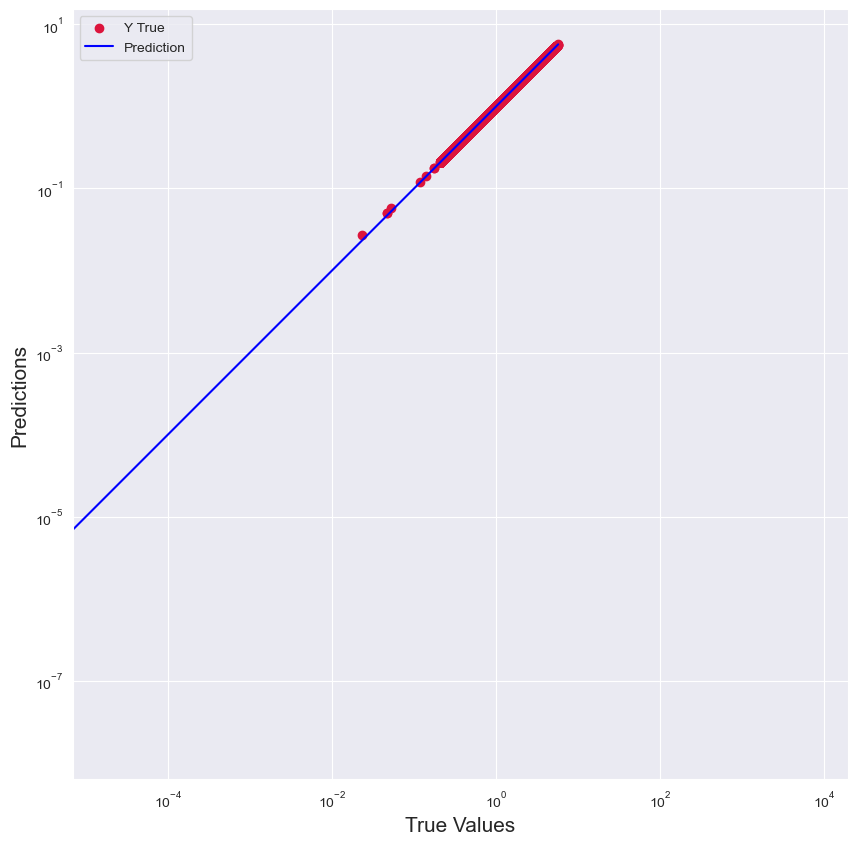

In [134]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_7, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_7), max(Y_test))
p2 = min(min(prediction_7), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [83]:
model_7.save('Saved_models/model_7_Poweresti.h5')

# Model 8

In [84]:
%%time
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'linear',return_sequences=True, input_shape=(4,1)),
                               tf.keras.layers.LSTM(20,activation= 'linear'),
                               tf.keras.layers.Dense(5,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_8 = model_8.fit(X_train,Y_train,batch_size=64,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
12436/12436 [==============================] - 80s 6ms/step - loss: 0.1189 - rmse: 0.5681 - mae: 0.1189 - mse: 0.3228 - mape: 15842978.0000 - val_loss: 0.0217 - val_rmse: 0.0449 - val_mae: 0.0217 - val_mse: 0.0020 - val_mape: 4367839.5000
Epoch 2/40
12436/12436 [==============================] - 75s 6ms/step - loss: 0.0178 - rmse: 0.0363 - mae: 0.0178 - mse: 0.0013 - mape: 2582034.5000 - val_loss: 0.0131 - val_rmse: 0.0297 - val_mae: 0.0131 - val_mse: 8.8193e-04 - val_mape: 1176298.7500
Epoch 3/40
12436/12436 [==============================] - 77s 6ms/step - loss: 0.0135 - rmse: 0.0272 - mae: 0.0135 - mse: 7.3724e-04 - mape: 1497709.3750 - val_loss: 0.0160 - val_rmse: 0.0258 - val_mae: 0.0160 - val_mse: 6.6529e-04 - val_mape: 2760267.2500
Epoch 4/40
12436/12436 [==============================] - 76s 6ms/step - loss: 0.0114 - rmse: 0.0231 - mae: 0.0114 - mse: 5.3145e-04 - mape: 1038179.1875 - val_loss: 0.0102 - val_rmse: 0.0214 - val_mae: 0.0102 - val_mse: 4.5886e-04 - val_ma

12436/12436 [==============================] - 78s 6ms/step - loss: 0.0060 - rmse: 0.0110 - mae: 0.0060 - mse: 1.2109e-04 - mape: 937389.6250 - val_loss: 0.0059 - val_rmse: 0.0109 - val_mae: 0.0059 - val_mse: 1.1958e-04 - val_mape: 938263.2500
Epoch 34/40
12436/12436 [==============================] - 76s 6ms/step - loss: 0.0060 - rmse: 0.0109 - mae: 0.0060 - mse: 1.1876e-04 - mape: 941476.2500 - val_loss: 0.0059 - val_rmse: 0.0108 - val_mae: 0.0059 - val_mse: 1.1687e-04 - val_mape: 918229.3750
Epoch 35/40
12436/12436 [==============================] - 78s 6ms/step - loss: 0.0059 - rmse: 0.0108 - mae: 0.0059 - mse: 1.1658e-04 - mape: 945156.3125 - val_loss: 0.0058 - val_rmse: 0.0108 - val_mae: 0.0058 - val_mse: 1.1604e-04 - val_mape: 934720.6250
Epoch 36/40
12436/12436 [==============================] - 76s 6ms/step - loss: 0.0059 - rmse: 0.0107 - mae: 0.0059 - mse: 1.1454e-04 - mape: 948014.3125 - val_loss: 0.0058 - val_rmse: 0.0106 - val_mae: 0.0058 - val_mse: 1.1249e-04 - val_mape: 

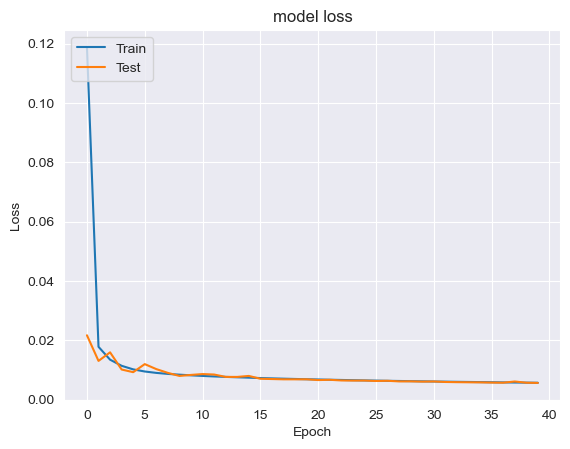

In [85]:
plot_his(history_8)

In [86]:
prediction_8 = model_8.predict(X_test)

6218/6218 [==============================] - 17s 3ms/step


In [87]:
model_8.evaluate(X_test,Y_test)

6218/6218 [==============================] - 19s 3ms/step - loss: 0.0057 - rmse: 0.0103 - mae: 0.0057 - mse: 1.0583e-04 - mape: 901063.1250


[0.005656599532812834,
 0.010287356562912464,
 0.005656599532812834,
 0.00010582969844108447,
 901063.125]

In [88]:
AIC_value(model_8,prediction_8,Y_test)

AIC:  32410.492


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


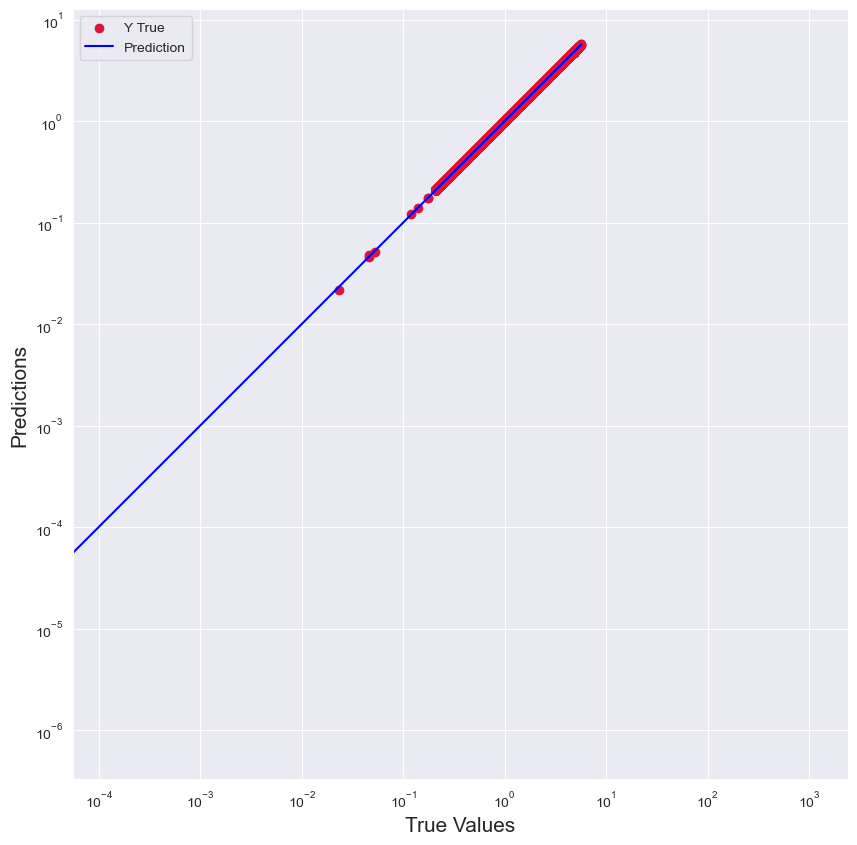

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_8, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_8), max(Y_test))
p2 = min(min(prediction_8), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [89]:
model_8.save('Saved_models/model_8_Poweresti.h5')

# Model 9

In [92]:
%%time
model_9 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(10,2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_9 = model_9.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
24872/24872 [==============================] - 64s 3ms/step - loss: 0.2281 - rmse: 0.4848 - mae: 0.2281 - mse: 0.2351 - mape: 39603488.0000 - val_loss: 0.1965 - val_rmse: 0.3079 - val_mae: 0.1965 - val_mse: 0.0948 - val_mape: 27366768.0000
Epoch 2/50
24872/24872 [==============================] - 72s 3ms/step - loss: 0.1961 - rmse: 0.3060 - mae: 0.1961 - mse: 0.0936 - mape: 34136536.0000 - val_loss: 0.1974 - val_rmse: 0.3071 - val_mae: 0.1974 - val_mse: 0.0943 - val_mape: 41413100.0000
Epoch 3/50
24872/24872 [==============================] - 78s 3ms/step - loss: 0.1955 - rmse: 0.3058 - mae: 0.1955 - mse: 0.0935 - mape: 33712548.0000 - val_loss: 0.1947 - val_rmse: 0.3076 - val_mae: 0.1947 - val_mse: 0.0946 - val_mape: 32697490.0000
Epoch 4/50
24872/24872 [==============================] - 71s 3ms/step - loss: 0.1953 - rmse: 0.3057 - mae: 0.1953 - mse: 0.0934 - mape: 33548564.0000 - val_loss: 0.1962 - val_rmse: 0.3067 - val_mae: 0.1962 - val_mse: 0.0941 - val_mape: 27402048.0

In [93]:
model_9.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1947 - rmse: 0.3052 - mae: 0.1947 - mse: 0.0932 - mape: 31740788.0000


[0.19472232460975647,
 0.3052096962928772,
 0.19472232460975647,
 0.0931529551744461,
 31740788.0]

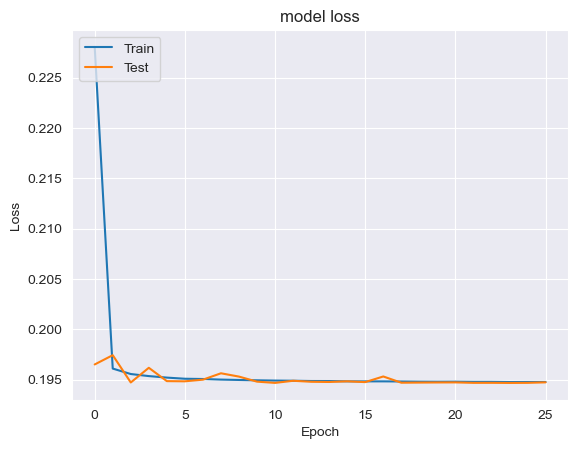

In [94]:
plot_his(history_9)

In [95]:
prediction_9 = model_9.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [96]:
AIC_value(model_9,prediction_9,Y_test)

AIC:  551.0273


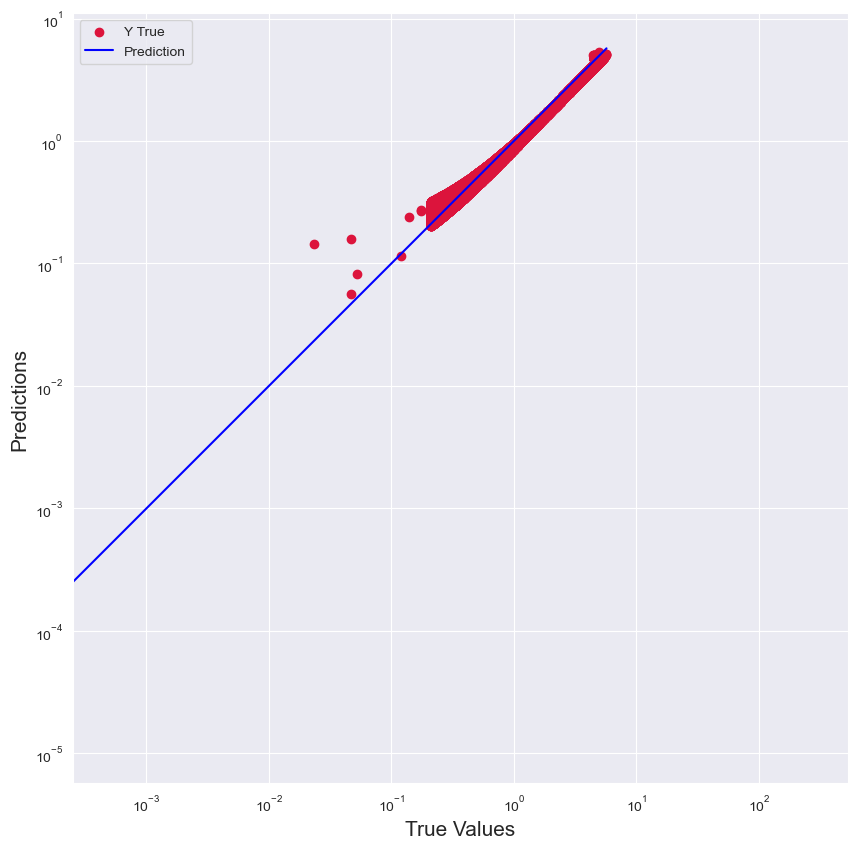

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_9, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_9), max(Y_test))
p2 = min(min(prediction_9), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [97]:
model_9.save('Saved_models/model_9_Poweresti.h5')

# Model 10

In [98]:
%%time
model_10 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(10,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_10.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_10 = model_10.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 78s 3ms/step - loss: 0.2101 - rmse: 0.3588 - mae: 0.2101 - mse: 0.1287 - mape: 39352812.0000 - val_loss: 0.1953 - val_rmse: 0.3064 - val_mae: 0.1953 - val_mse: 0.0939 - val_mape: 29708176.0000
Epoch 2/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.1979 - rmse: 0.3072 - mae: 0.1979 - mse: 0.0943 - mape: 35313852.0000 - val_loss: 0.1974 - val_rmse: 0.3227 - val_mae: 0.1974 - val_mse: 0.1041 - val_mape: 37526700.0000
Epoch 3/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.1968 - rmse: 0.3067 - mae: 0.1968 - mse: 0.0941 - mape: 34550360.0000 - val_loss: 0.1965 - val_rmse: 0.3153 - val_mae: 0.1965 - val_mse: 0.0994 - val_mape: 36626492.0000
Epoch 4/100
24872/24872 [==============================] - 74s 3ms/step - loss: 0.1962 - rmse: 0.3064 - mae: 0.1962 - mse: 0.0939 - mape: 34228384.0000 - val_loss: 0.1974 - val_rmse: 0.3027 - val_mae: 0.1974 - val_mse: 0.0916 - val_mape: 271700

24872/24872 [==============================] - 74s 3ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33144328.0000 - val_loss: 0.1954 - val_rmse: 0.3034 - val_mae: 0.1954 - val_mse: 0.0920 - val_mape: 37446664.0000
Epoch 34/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33199464.0000 - val_loss: 0.1950 - val_rmse: 0.3049 - val_mae: 0.1950 - val_mse: 0.0930 - val_mape: 30342986.0000
Epoch 35/100
24872/24872 [==============================] - 73s 3ms/step - loss: 0.1948 - rmse: 0.3053 - mae: 0.1948 - mse: 0.0932 - mape: 33192248.0000 - val_loss: 0.1949 - val_rmse: 0.3063 - val_mae: 0.1949 - val_mse: 0.0938 - val_mape: 30704058.0000
Epoch 35: early stopping
CPU times: total: 1h 4min 35s
Wall time: 42min 35s


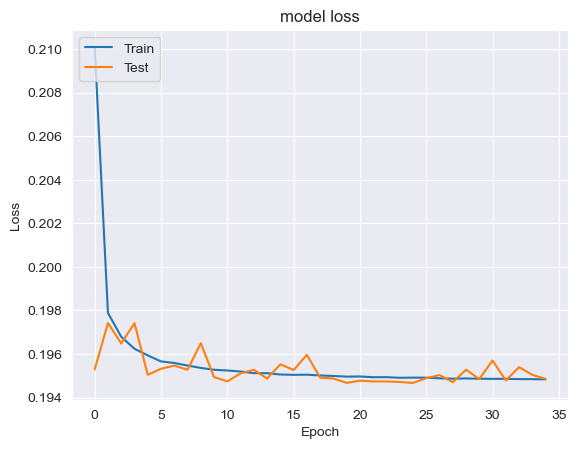

In [99]:
plot_his(history_10)

In [100]:
model_10.evaluate(X_test,Y_test)

6218/6218 [==============================] - 12s 2ms/step - loss: 0.1949 - rmse: 0.3063 - mae: 0.1949 - mse: 0.0938 - mape: 30704058.0000


[0.1948564350605011,
 0.30627402663230896,
 0.1948564350605011,
 0.093803770840168,
 30704058.0]

In [101]:
prediction_10 = model_10.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [102]:
AIC_value(model_10,prediction_10,Y_test)

AIC:  1791.0284


In [103]:
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 10)             30        
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 10)             210       
                                                                 
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 20)                420       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 881
Trainable params: 881
Non-trainable

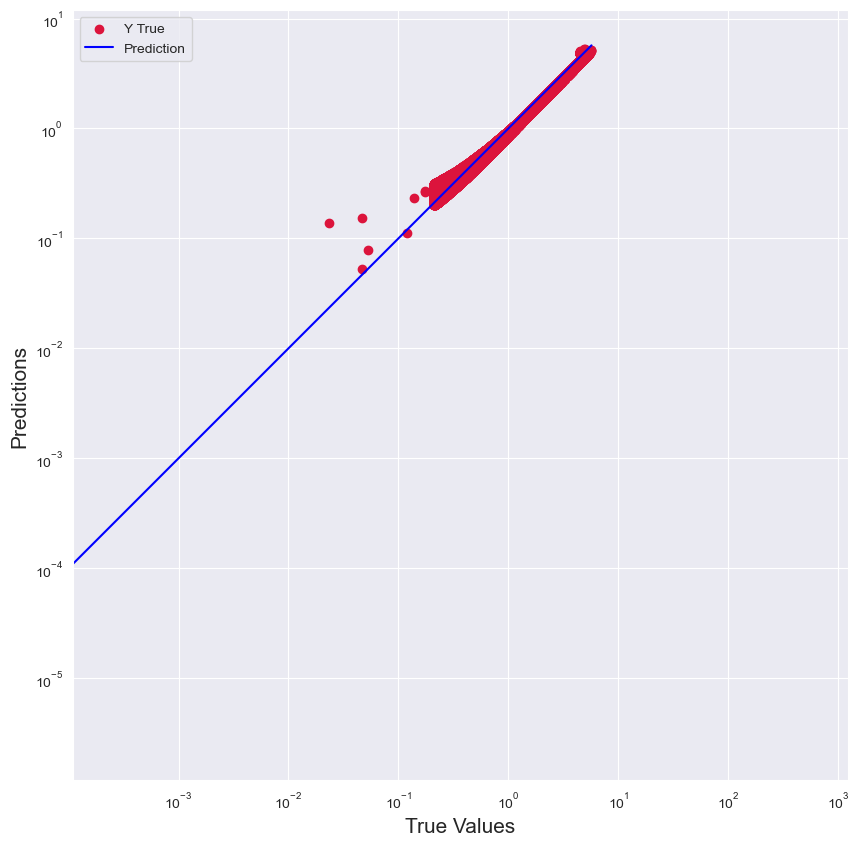

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_10, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_10), max(Y_test))
p2 = min(min(prediction_10), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [104]:
model_10.save('Saved_models/model_10_Poweresti.h5')

# Model 11

In [145]:
%%time
model_11 = tf.keras.Sequential([tf.keras.layers.Conv1D(28,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(16,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(10,activation="linear"),
                               tf.keras.layers.Dense(5,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_11.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_11 = model_11.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
24872/24872 [==============================] - 66s 3ms/step - loss: 0.0241 - rmse: 0.2166 - mae: 0.0241 - mse: 0.0469 - mape: 3849441.7500 - val_loss: 0.0082 - val_rmse: 0.0273 - val_mae: 0.0082 - val_mse: 7.4490e-04 - val_mape: 1231954.0000
Epoch 2/100
24872/24872 [==============================] - 57s 2ms/step - loss: 0.0054 - rmse: 0.0244 - mae: 0.0054 - mse: 5.9695e-04 - mape: 570751.4375 - val_loss: 0.0045 - val_rmse: 0.0222 - val_mae: 0.0045 - val_mse: 4.9290e-04 - val_mape: 477545.3125
Epoch 3/100
24872/24872 [==============================] - 56s 2ms/step - loss: 0.0043 - rmse: 0.0217 - mae: 0.0043 - mse: 4.7090e-04 - mape: 559879.8750 - val_loss: 0.0045 - val_rmse: 0.0209 - val_mae: 0.0045 - val_mse: 4.3492e-04 - val_mape: 735290.3125
Epoch 4/100
24872/24872 [==============================] - 55s 2ms/step - loss: 0.0040 - rmse: 0.0208 - mae: 0.0040 - mse: 4.3092e-04 - mape: 586723.2500 - val_loss: 0.0036 - val_rmse: 0.0202 - val_mae: 0.0036 - val_mse: 4.0826e-04 - 

Epoch 33/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.0029 - rmse: 0.0181 - mae: 0.0029 - mse: 3.2765e-04 - mape: 411840.2188 - val_loss: 0.0029 - val_rmse: 0.0180 - val_mae: 0.0029 - val_mse: 3.2265e-04 - val_mape: 386206.5625
Epoch 34/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.0029 - rmse: 0.0181 - mae: 0.0029 - mse: 3.2720e-04 - mape: 410242.0312 - val_loss: 0.0029 - val_rmse: 0.0180 - val_mae: 0.0029 - val_mse: 3.2235e-04 - val_mape: 393573.9375
Epoch 35/100
24872/24872 [==============================] - 83s 3ms/step - loss: 0.0029 - rmse: 0.0181 - mae: 0.0029 - mse: 3.2683e-04 - mape: 408819.7188 - val_loss: 0.0029 - val_rmse: 0.0179 - val_mae: 0.0029 - val_mse: 3.2197e-04 - val_mape: 392184.8750
Epoch 36/100
24872/24872 [==============================] - 97s 4ms/step - loss: 0.0029 - rmse: 0.0181 - mae: 0.0029 - mse: 3.2632e-04 - mape: 407620.0000 - val_loss: 0.0029 - val_rmse: 0.0179 - val_mae: 0.0029 - val_mse: 3.2152e

Epoch 65/100
24872/24872 [==============================] - 68s 3ms/step - loss: 0.0028 - rmse: 0.0179 - mae: 0.0028 - mse: 3.1964e-04 - mape: 380991.0938 - val_loss: 0.0028 - val_rmse: 0.0178 - val_mae: 0.0028 - val_mse: 3.1582e-04 - val_mape: 369890.6562
Epoch 66/100
24872/24872 [==============================] - 67s 3ms/step - loss: 0.0028 - rmse: 0.0179 - mae: 0.0028 - mse: 3.1952e-04 - mape: 380308.2500 - val_loss: 0.0028 - val_rmse: 0.0178 - val_mae: 0.0028 - val_mse: 3.1569e-04 - val_mape: 362156.9062
Epoch 67/100
24872/24872 [==============================] - 90s 4ms/step - loss: 0.0028 - rmse: 0.0179 - mae: 0.0028 - mse: 3.1936e-04 - mape: 379625.5938 - val_loss: 0.0028 - val_rmse: 0.0178 - val_mae: 0.0028 - val_mse: 3.1550e-04 - val_mape: 362366.4062
Epoch 68/100
24872/24872 [==============================] - 93s 4ms/step - loss: 0.0028 - rmse: 0.0179 - mae: 0.0028 - mse: 3.1920e-04 - mape: 378923.5000 - val_loss: 0.0028 - val_rmse: 0.0178 - val_mae: 0.0028 - val_mse: 3.1543e

Epoch 97/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0027 - rmse: 0.0178 - mae: 0.0027 - mse: 3.1650e-04 - mape: 367737.6562 - val_loss: 0.0027 - val_rmse: 0.0177 - val_mae: 0.0027 - val_mse: 3.1332e-04 - val_mape: 353878.1562
Epoch 98/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0027 - rmse: 0.0178 - mae: 0.0027 - mse: 3.1639e-04 - mape: 367343.7812 - val_loss: 0.0027 - val_rmse: 0.0177 - val_mae: 0.0027 - val_mse: 3.1327e-04 - val_mape: 355912.0625
Epoch 99/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0027 - rmse: 0.0178 - mae: 0.0027 - mse: 3.1640e-04 - mape: 366985.6562 - val_loss: 0.0027 - val_rmse: 0.0177 - val_mae: 0.0027 - val_mse: 3.1314e-04 - val_mape: 350415.4062
Epoch 100/100
24872/24872 [==============================] - 51s 2ms/step - loss: 0.0027 - rmse: 0.0178 - mae: 0.0027 - mse: 3.1635e-04 - mape: 366647.9688 - val_loss: 0.0027 - val_rmse: 0.0177 - val_mae: 0.0027 - val_mse: 3.1308

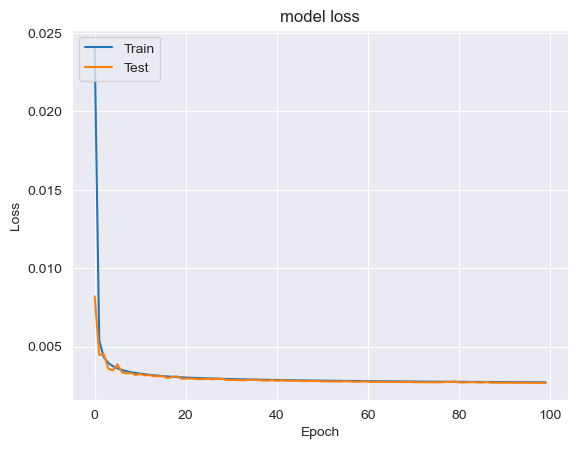

In [146]:
plot_his(history_11)

In [147]:
model_11.evaluate(X_test,Y_test)

6218/6218 [==============================] - 9s 1ms/step - loss: 0.0027 - rmse: 0.0177 - mae: 0.0027 - mse: 3.1308e-04 - mape: 348890.6562


[0.0026940687093883753,
 0.017694152891635895,
 0.0026940687093883753,
 0.0003130830591544509,
 348890.65625]

In [148]:
prediction_11 = model_11.predict(X_test)

6218/6218 [==============================] - 9s 1ms/step


In [149]:
AIC_value(model_11,prediction_11,Y_test)

AIC:  2802.4995


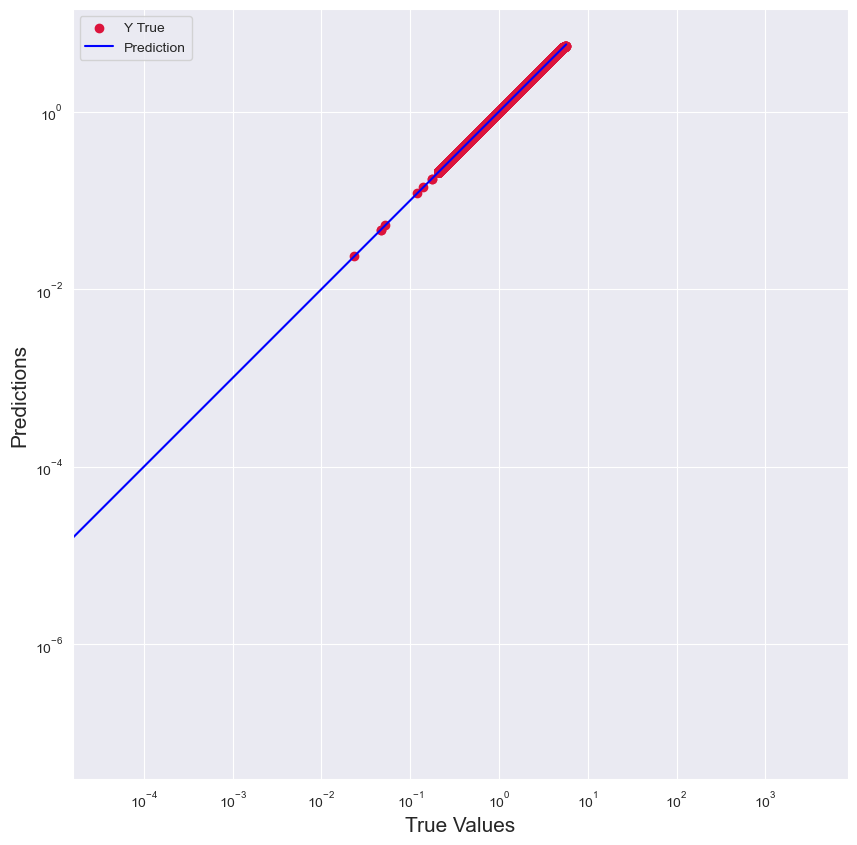

In [150]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_11, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_11), max(Y_test))
p2 = min(min(prediction_11), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [151]:
model_11.save('Saved_models/model_11_Poweresti.h5')

# Model 12

In [111]:
%%time
model_12 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,2,activation='linear',input_shape=(4,1)),
                               tf.keras.layers.Conv1D(8,2,activation='linear'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_12.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse','mape'])

history_12 = model_12.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
24872/24872 [==============================] - 64s 3ms/step - loss: 0.2139 - rmse: 0.3995 - mae: 0.2139 - mse: 0.1596 - mape: 38085992.0000 - val_loss: 0.1957 - val_rmse: 0.3085 - val_mae: 0.1957 - val_mse: 0.0952 - val_mape: 28184270.0000
Epoch 2/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.1972 - rmse: 0.3066 - mae: 0.1972 - mse: 0.0940 - mape: 34818164.0000 - val_loss: 0.1980 - val_rmse: 0.3139 - val_mae: 0.1980 - val_mse: 0.0985 - val_mape: 41265320.0000
Epoch 3/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.1963 - rmse: 0.3063 - mae: 0.1963 - mse: 0.0938 - mape: 34228124.0000 - val_loss: 0.1967 - val_rmse: 0.3111 - val_mae: 0.1967 - val_mse: 0.0968 - val_mape: 39065152.0000
Epoch 4/100
24872/24872 [==============================] - 63s 3ms/step - loss: 0.1959 - rmse: 0.3061 - mae: 0.1959 - mse: 0.0937 - mape: 33964976.0000 - val_loss: 0.1972 - val_rmse: 0.3035 - val_mae: 0.1972 - val_mse: 0.0921 - val_mape: 271688

24872/24872 [==============================] - 61s 2ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0933 - mape: 33106938.0000 - val_loss: 0.1953 - val_rmse: 0.3024 - val_mae: 0.1953 - val_mse: 0.0915 - val_mape: 37254324.0000
Epoch 34/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.1948 - rmse: 0.3054 - mae: 0.1948 - mse: 0.0932 - mape: 33182268.0000 - val_loss: 0.1950 - val_rmse: 0.3051 - val_mae: 0.1950 - val_mse: 0.0931 - val_mape: 30461652.0000
Epoch 35/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.1948 - rmse: 0.3052 - mae: 0.1948 - mse: 0.0932 - mape: 33167370.0000 - val_loss: 0.1948 - val_rmse: 0.3056 - val_mae: 0.1948 - val_mse: 0.0934 - val_mape: 31025090.0000
Epoch 36/100
24872/24872 [==============================] - 60s 2ms/step - loss: 0.1948 - rmse: 0.3053 - mae: 0.1948 - mse: 0.0932 - mape: 33175964.0000 - val_loss: 0.1948 - val_rmse: 0.3074 - val_mae: 0.1948 - val_mse: 0.0945 - val_mape: 30721684.0000
E

24872/24872 [==============================] - 62s 3ms/step - loss: 0.1947 - rmse: 0.3053 - mae: 0.1947 - mse: 0.0932 - mape: 33107192.0000 - val_loss: 0.1947 - val_rmse: 0.3046 - val_mae: 0.1947 - val_mse: 0.0928 - val_mape: 33295630.0000
Epoch 66/100
24872/24872 [==============================] - 62s 3ms/step - loss: 0.1947 - rmse: 0.3053 - mae: 0.1947 - mse: 0.0932 - mape: 33096908.0000 - val_loss: 0.1947 - val_rmse: 0.3047 - val_mae: 0.1947 - val_mse: 0.0929 - val_mape: 32846252.0000
Epoch 67/100
24872/24872 [==============================] - 62s 3ms/step - loss: 0.1947 - rmse: 0.3052 - mae: 0.1947 - mse: 0.0932 - mape: 33173860.0000 - val_loss: 0.1947 - val_rmse: 0.3044 - val_mae: 0.1947 - val_mse: 0.0927 - val_mape: 33256456.0000
Epoch 68/100
24872/24872 [==============================] - 62s 3ms/step - loss: 0.1947 - rmse: 0.3053 - mae: 0.1947 - mse: 0.0932 - mape: 33100738.0000 - val_loss: 0.1947 - val_rmse: 0.3070 - val_mae: 0.1947 - val_mse: 0.0942 - val_mape: 32035344.0000
E

24872/24872 [==============================] - 62s 2ms/step - loss: 0.1947 - rmse: 0.3053 - mae: 0.1947 - mse: 0.0932 - mape: 33092028.0000 - val_loss: 0.1947 - val_rmse: 0.3032 - val_mae: 0.1947 - val_mse: 0.0919 - val_mape: 32872696.0000
Epoch 98/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.1947 - rmse: 0.3051 - mae: 0.1947 - mse: 0.0931 - mape: 33126158.0000 - val_loss: 0.1947 - val_rmse: 0.3055 - val_mae: 0.1947 - val_mse: 0.0934 - val_mape: 32505656.0000
Epoch 99/100
24872/24872 [==============================] - 61s 2ms/step - loss: 0.1947 - rmse: 0.3053 - mae: 0.1947 - mse: 0.0932 - mape: 33081562.0000 - val_loss: 0.1947 - val_rmse: 0.3032 - val_mae: 0.1947 - val_mse: 0.0919 - val_mape: 33927052.0000
Epoch 100/100
24872/24872 [==============================] - 62s 2ms/step - loss: 0.1947 - rmse: 0.3052 - mae: 0.1947 - mse: 0.0932 - mape: 33135460.0000 - val_loss: 0.1947 - val_rmse: 0.3042 - val_mae: 0.1947 - val_mse: 0.0925 - val_mape: 32360884.0000


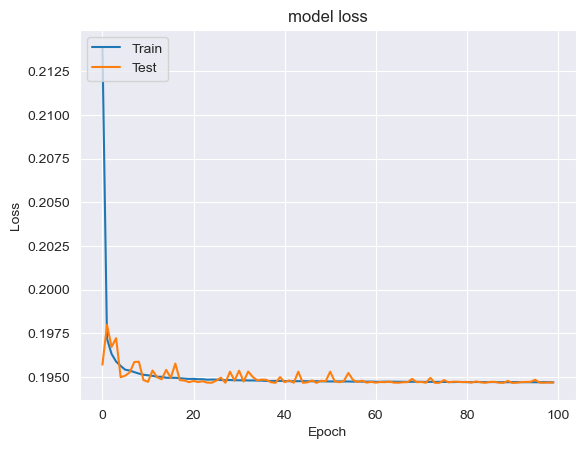

In [112]:
plot_his(history_12)

In [113]:
model_12.evaluate(X_test,Y_test)

6218/6218 [==============================] - 11s 2ms/step - loss: 0.1947 - rmse: 0.3042 - mae: 0.1947 - mse: 0.0925 - mape: 32360884.0000


[0.19468161463737488,
 0.3042026460170746,
 0.19468161463737488,
 0.09253925085067749,
 32360884.0]

In [114]:
prediction_12 = model_12.predict(X_test)

6218/6218 [==============================] - 8s 1ms/step


In [115]:
AIC_value(model_12,prediction_12,Y_test)

AIC:  1443.016


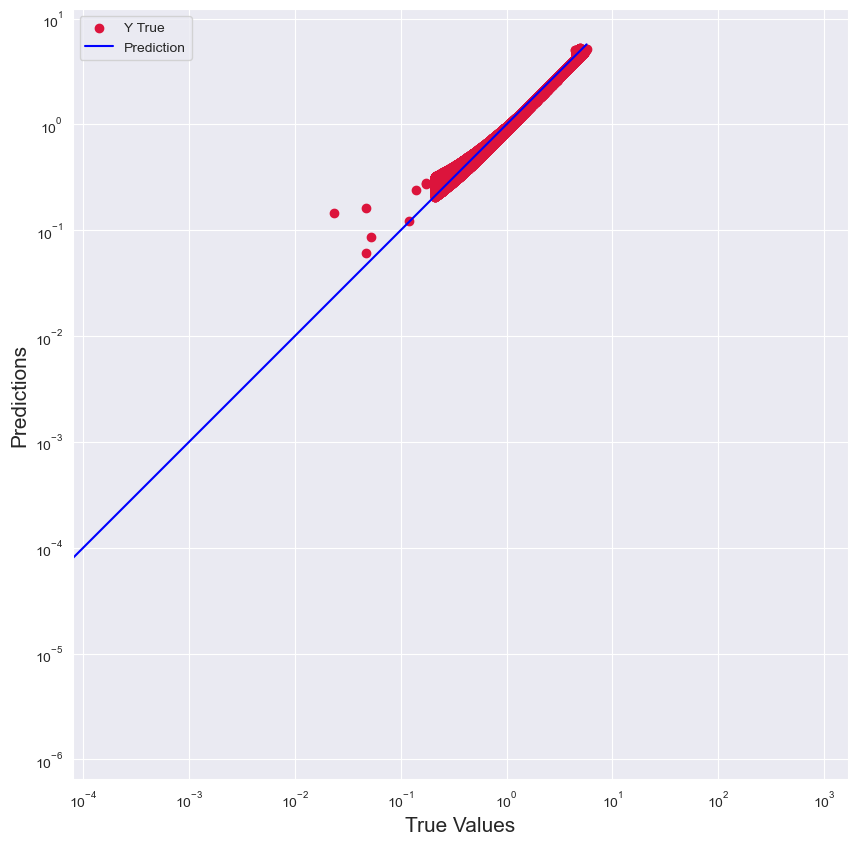

In [137]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, prediction_12, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction_12), max(Y_test))
p2 = min(min(prediction_12), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.legend(["Y True", "Prediction"], loc ="upper left")
plt.show()

In [116]:
model_12.save('Saved_models/model_12_Poweresti.h5')

Text(0.5, 1.0, 'Real Vs Predicted')

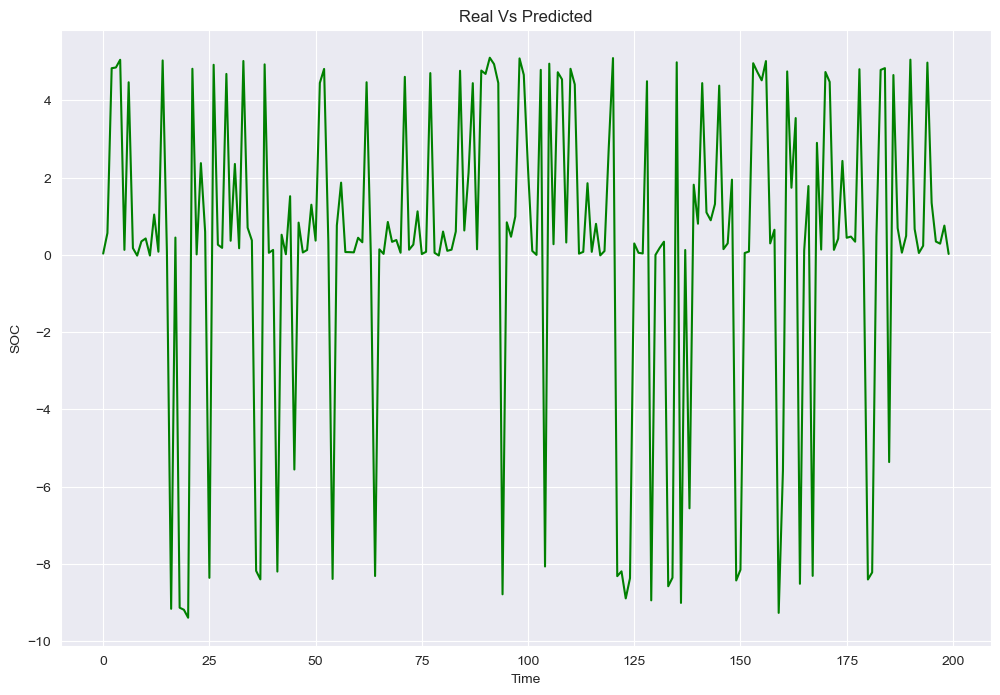

In [117]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
# plt.plot(Y[:20000],color='r')
plt.plot(Y_pred_2[:200],color='g')
plt.ylabel('SOC')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Real Vs Predicted')

In [119]:
df.head()

,Time,Potential,Current,Capacity
0,0.000000e+00,0.822158,0.969868,0.554717
1,5.000005e-07,0.824159,0.969847,0.554823
2,1.500001e-06,0.826242,0.969850,0.554996
3,2.500002e-06,0.828049,0.969850,0.555148
4,3.500003e-06,0.829519,0.969850,0.555320
